<a href="https://colab.research.google.com/github/chrisaMel/Machine-Learning/blob/BitCoin-Predictor/BitCoinApallaktiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Εισαγωγή δεδομένων


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [38]:
from google.colab import files

#Εισαγωγή του αρχείου
uploaded = files.upload()


Saving BTC_USD Bitfinex Historical Data LargeDataset.csv to BTC_USD Bitfinex Historical Data LargeDataset (2).csv


In [40]:
import pandas as pd

#Διάβασμα του αρχείου και εμφάνηση των 5 πρώτων στηλών
df = pd.read_csv('BTC_USD Bitfinex Historical Data LargeDataset.csv')
df.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,01/01/2022,"47,755.0","46,218.0","47,954.0","46,215.0",2.18K,3.33%
1,01/02/2022,"47,314.0","47,755.0","47,980.0","46,698.0",1.84K,-0.92%
2,01/03/2022,"46,445.0","47,314.0","47,578.0","45,701.0",2.58K,-1.84%
3,01/04/2022,"45,830.0","46,445.0","47,546.0","45,583.0",3.79K,-1.32%
4,01/05/2022,"43,418.0","45,830.0","47,056.7","42,519.0",6.93K,-5.26%


In [41]:
#Μετατροπή των δεδομένων σε αριθμητική μορφή και μετατροπή της μεταβλητής date σε ημερομηνία

# Αντικατάσταση κόμματος με τελεία και μετατροπή σε float
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Vol.'] = df['Vol.'].str.replace('K', 'e3').str.replace(',', '').astype(float)

# Αφαίρεση του % και μετατροπή της στήλης Change % σε float
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

#Μετατροπή της στήλης Date σε τύπο ημερομηνίας
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.set_index('Date', inplace=True)


# Έλεγχος ότι έγιναν οι επιθυμητές αλλαγές
print(df.info())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1097 entries, 2022-01-01 to 2025-01-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1097 non-null   float64
 1   Open      1097 non-null   float64
 2   High      1097 non-null   float64
 3   Low       1097 non-null   float64
 4   Vol.      1097 non-null   float64
 5   Change %  1097 non-null   float64
dtypes: float64(6)
memory usage: 60.0 KB
None


In [6]:
!pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=40475e45e9df2e4dc7358a5a7f32248eaa41b671b2764c7fbc331dff79558c38
  Stored in directory: /root/.cache/pip/wheels/7f/33/8b/50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas-ta


In [42]:
#Υπολογισμός των τεχνικών δεικτών ΜΑ_10 RSI ROC OBV
import pandas_ta as ta

# 10-ημερών κινητός μέσος όρος
df['MA_10'] = df['Price'].rolling(window=10).mean()

# Υπολογισμός RSI (14 ημερών)
df['RSI'] = ta.rsi(df['Price'], length=14)

# Υπολογισμός ROC (10 ημερών)
df['ROC'] = ta.roc(df['Price'], length=10)

# Υπολογισμός OBV
df['OBV'] = ta.obv(df['Price'], df['Vol.'])

# Εμφάνιση του αποτελέσματος
print('Όλα τα δεδομένα \n',df)


Όλα τα δεδομένα 
               Price     Open     High      Low    Vol.  Change %    MA_10  \
Date                                                                        
2022-01-01  47755.0  46218.0  47954.0  46215.0  2180.0      3.33      NaN   
2022-01-02  47314.0  47755.0  47980.0  46698.0  1840.0     -0.92      NaN   
2022-01-03  46445.0  47314.0  47578.0  45701.0  2580.0     -1.84      NaN   
2022-01-04  45830.0  46445.0  47546.0  45583.0  3790.0     -1.32      NaN   
2022-01-05  43418.0  45830.0  47056.7  42519.0  6930.0     -5.26      NaN   
...             ...      ...      ...      ...     ...       ...      ...   
2024-12-28  95533.0  94419.0  95854.0  94311.0   290.0      1.18  96678.5   
2024-12-29  93944.0  95533.0  95556.0  93199.0   590.0     -1.66  96321.4   
2024-12-30  92982.0  93944.0  95130.0  91696.0  1820.0     -1.02  95833.9   
2024-12-31  93780.0  92982.0  96400.0  92175.0  1120.0      0.86  95483.0   
2025-01-01  94757.0  93780.0  95282.0  93131.0   550.0    

# Παραμορφοποίηση δεδομένων

In [43]:
# Έλεγχος για ελλιπείς τιμές και αριθμός δειγμάτων
missing_values = df.isnull().sum()
print("Ελλιπείς τιμές ανά στήλη:\n", missing_values)

#Εμφανιση του μεγέθους του dataset
print("Αριθμός γραμμών (δειγμάτων):", df.shape[0])
print("Αριθμός στηλών (χαρακτηριστικών):", df.shape[1])

#Αφαίρεση των τιμών NaN από το dataset και εμφάνιση ξανα των χαμένων τιμών για επιβεβαίωση
df = df.dropna()
print("Ελλιπείς τιμές ανά στήλη:\n", df.isnull().sum())

#Εμφάνιση του τελικού μεγέθους του dataset
print("Αριθμός γραμμών (δειγμάτων):", df.shape[0])
print("Αριθμός στηλών (χαρακτηριστικών):", df.shape[1])

Ελλιπείς τιμές ανά στήλη:
 Price        0
Open         0
High         0
Low          0
Vol.         0
Change %     0
MA_10        9
RSI         14
ROC         10
OBV          0
dtype: int64
Αριθμός γραμμών (δειγμάτων): 1097
Αριθμός στηλών (χαρακτηριστικών): 10
Ελλιπείς τιμές ανά στήλη:
 Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
MA_10       0
RSI         0
ROC         0
OBV         0
dtype: int64
Αριθμός γραμμών (δειγμάτων): 1083
Αριθμός στηλών (χαρακτηριστικών): 10


Text(0.5, 1.0, 'Κατανομή Όγκου Συναλλαγών')

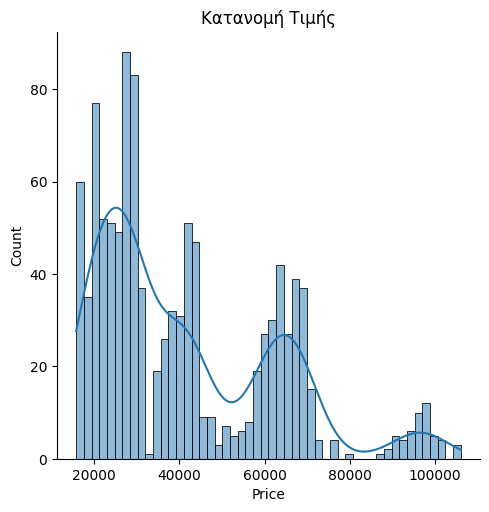

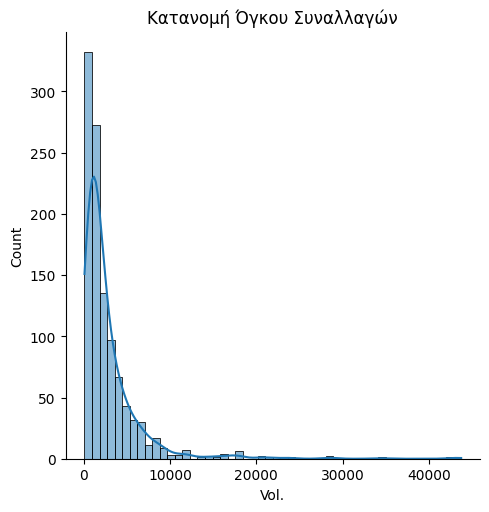

In [44]:
#έλεγχος κατανομής της τιμής και του όγκου αγορών
import seaborn as sns

sns.displot( df['Price'], kde = True, bins = 50 )
plt.title('Κατανομή Τιμής')

sns.displot( df['Vol.'], kde = True, bins = 50 )
plt.title('Κατανομή Όγκου Συναλλαγών')



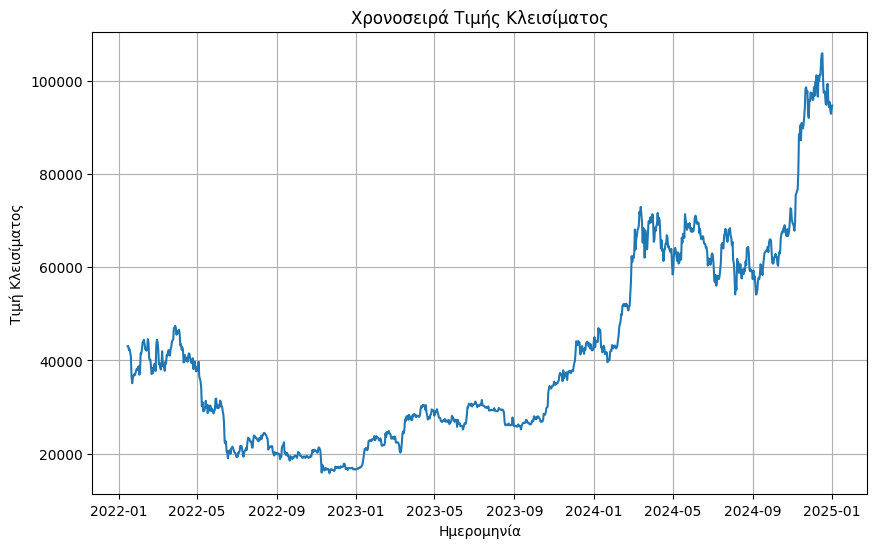

In [45]:
#Οπτικοποίηση της τιμής σε βάθος χρόνου
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'])
plt.title('Χρονοσειρά Τιμής Κλεισίματος')
plt.xlabel('Ημερομηνία')
plt.ylabel('Τιμή Κλεισίματος')
plt.grid(True)
plt.show()


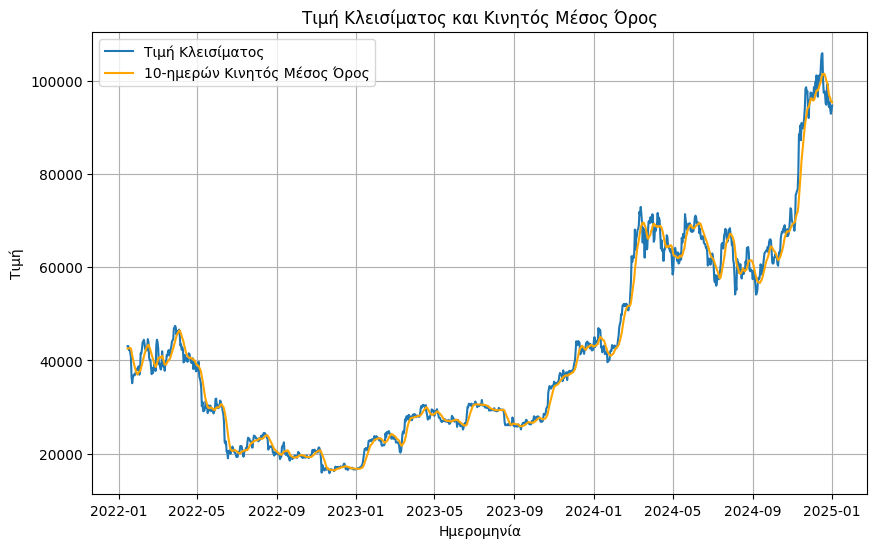

In [46]:
#Οπτικοποίηση της τιμής και του κινητού μέσου όρου σε βάθος χρόνου

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Τιμή Κλεισίματος')
plt.plot(df.index, df['MA_10'], label='10-ημερών Κινητός Μέσος Όρος', color='orange')
plt.title('Τιμή Κλεισίματος και Κινητός Μέσος Όρος')
plt.xlabel('Ημερομηνία')
plt.ylabel('Τιμή')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
#Έλεγχος για κανονικοποίηση των features και εκτέλεση
from sklearn.preprocessing import MinMaxScaler


# Εμφάνιση βασικών στατιστικών για κάθε αριθμητική στήλη
print("\nΒασικά στατιστικά στοιχεία για κάθε στήλη:")
print(df.describe())

# Δημιουργία scaler
scaler = MinMaxScaler()

# Κανονικοποίηση όλων των αριθμητικών στηλών
scaled_data = scaler.fit_transform(df)

# Δημιουργία νέου dataframe με τα κανονικοποιημένα δεδομένα
df = pd.DataFrame(scaled_data, columns=df.columns)

print("Κανονικοποιημένα δεδομένα με Min-Max Scaling:")
print(df.head())



Βασικά στατιστικά στοιχεία για κάθε στήλη:
               Price           Open           High            Low  \
count    1083.000000    1083.000000    1083.000000    1083.000000   
mean    41064.934441   41017.439797   41839.329548   40204.622253   
std     20942.356511   20878.456602   21322.449557   20460.862355   
min     15766.000000   15766.000000   16279.000000   15501.000000   
25%     24442.500000   24442.500000   25201.500000   24112.000000   
50%     34669.000000   34669.000000   35175.000000   34079.000000   
75%     59345.000000   59304.000000   60724.000000   58042.500000   
max    105990.000000  106000.000000  108080.000000  105160.000000   

               Vol.     Change %          MA_10          RSI          ROC  \
count   1083.000000  1083.000000    1083.000000  1083.000000  1083.000000   
mean    2768.476454     0.113176   40849.028994    52.402403     1.173628   
std     3770.018384     2.842161   20590.849293    13.825426     9.241606   
min       90.000000   -15.

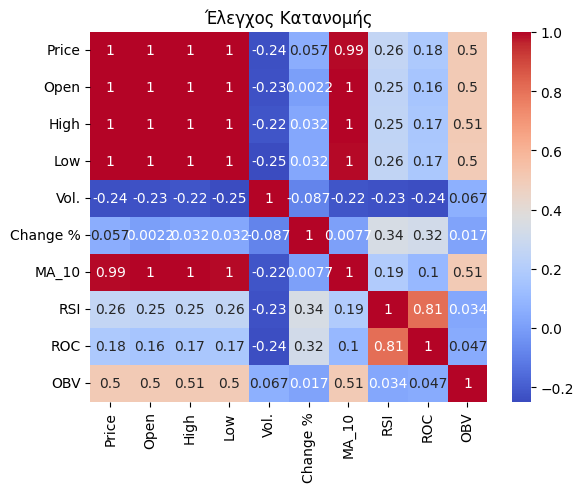


Original Dataset:
      Price      Open      High       Low      Vol.  Change %     MA_10  \
0  0.302613  0.302824  0.299855  0.302245  0.071232  0.518064  0.307272   
1  0.302780  0.302580  0.296380  0.302377  0.034127  0.520716  0.307240   
2  0.293447  0.302746  0.293156  0.290735  0.064819  0.455088  0.308090   
3  0.295088  0.293204  0.287611  0.287790  0.097343  0.531323  0.308924   
4  0.287174  0.295055  0.286513  0.286407  0.145671  0.464037  0.308720   

        RSI       ROC       OBV  
0  0.294209  0.489465  0.797928  
1  0.296322  0.499427  0.805045  
2  0.234808  0.523706  0.791892  
3  0.256762  0.523197  0.811441  
4  0.208715  0.494681  0.782387  

Training Features Dataset:
       Vol.  Change %     MA_10       RSI       ROC       OBV
0  0.071232  0.518064  0.307272  0.294209  0.489465  0.797928
1  0.034127  0.520716  0.307240  0.296322  0.499427  0.805045
2  0.064819  0.455088  0.308090  0.234808  0.523706  0.791892
3  0.097343  0.531323  0.308924  0.256762  0.52319

Text(0.5, 1.0, 'Τελικός Έλεγχος Κατανομής')

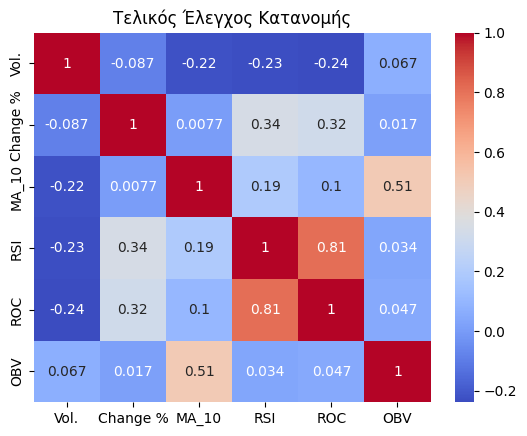

In [48]:
#ελεγχος για διαγραφη καποιων μεταβλητων απο το dataset λόγο μεγάλης συσχέτησης
import matplotlib.pyplot as plt

#οπτικοποίηση συσχετησης
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title('Έλεγχος Κατανομής')
plt.show()
# Αποθήκευση αρχικού dataset και αφαίρεση των  Price, Open, High και Low απο το τελικό dataset
OG_dataset = df.copy()

# Αφαίρεση των χαρακτηριστικών Price, Open, High, Low και Date από το dataset εκπαίδευσης
Final_df = df.drop(columns=["Price", "Open", "High", "Low"])

# Εμφάνιση των δύο datasets
print("\nOriginal Dataset:")
print(OG_dataset.head())

print("\nTraining Features Dataset:")
print(Final_df.head())

sns.heatmap(Final_df.corr(),cmap='coolwarm',annot=True)
plt.title('Τελικός Έλεγχος Κατανομής')

# Εκπαίδευση των μοντέλων

---



In [49]:
#Προετοιμασία για εκπαίδευση:εισαγωγή της στήλης της επόμενης μέρας (Target), διαχωρισμός του dataset σε train και test και δημιουργία των K-folds για cross-validation
from sklearn.model_selection import train_test_split, KFold

# Δημιουργία της στήλης Target με την τιμή της επόμενης ημέρας (με καθυστέρηση -1)
Final_df['Target'] = OG_dataset['Price'].shift(-1)

# Αφαίρεση των γραμμών με NaN που δημιουργούνται λόγω της μετατόπισης
Final_df = Final_df.dropna()

# Χωρισμός των χαρακτηριστικών και της ετικέτας στόχου (Target)
X = Final_df.drop(columns=["Target"])
y = Final_df["Target"]

# Χωρισμός σε training (80%) και test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Δημιουργία των K-folds για cross-validation (5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Παράδειγμα: Εμφάνιση των index των training και validation sets για κάθε fold
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    print(f"Fold {fold + 1}:")
    print(f"  Train indices: {train_index[:5]}... (total {len(train_index)})")
    print(f"  Validation indices: {val_index[:5]}... (total {len(val_index)})")


Fold 1:
  Train indices: [0 1 2 3 4]... (total 692)
  Validation indices: [ 5 10 23 29 30]... (total 173)
Fold 2:
  Train indices: [0 1 3 4 5]... (total 692)
  Validation indices: [ 2  6  7 18 24]... (total 173)
Fold 3:
  Train indices: [1 2 4 5 6]... (total 692)
  Validation indices: [ 0  3  9 11 12]... (total 173)
Fold 4:
  Train indices: [0 1 2 3 4]... (total 692)
  Validation indices: [ 8 16 17 26 36]... (total 173)
Fold 5:
  Train indices: [0 2 3 5 6]... (total 692)
  Validation indices: [ 1  4 13 14 20]... (total 173)


# Εκπαίδευση απλών μοντέλων Linear Regression, Random Forest, SVM

In [71]:
import time
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Ορισμός των μοντέλων
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVM": SVR(kernel='rbf')
}

# Λειτουργία για τον υπολογισμό των μετρικών
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R² Score": r2}

# Λίστα για αποθήκευση των αποτελεσμάτων που θα μετατραπεί σε DataFrame
results_list = []


# Dictionery για αποθήκευση των προβλέψεων (train, val, test) ανά μοντέλο
predictions_dict = {model_name: {"train": [], "val": [], "test": []} for model_name in models.keys()}

# Εκπαίδευση και αξιολόγηση κάθε μοντέλου με K-Fold cross-validation
for model_name, model in models.items():
    print(f"\n--- Εκπαίδευση του μοντέλου: {model_name} ---")

    fold_results = []  # Αποθήκευση των αποτελεσμάτων για κάθε fold για την εκτυπωση στην οθόνη

    for fold, (train_index, val_index) in enumerate(kf.split(X_train), start=1):
        print(f"\nFold {fold}:")

        # Διαχωρισμός δεδομένων σε train και validation sets για το fold
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Εκπαίδευση του μοντέλου
        start_time = time.time()
        model.fit(X_train_fold, y_train_fold)
        training_time = time.time() - start_time
        print(f"  Finished training in {training_time:.4f} seconds.")

        # Προβλέψεις
        predicted_train = model.predict(X_train_fold)
        predicted_val = model.predict(X_val_fold)
        predicted_test = model.predict(X_test)  # Πρόβλεψη στο test set

        # Αποθήκευση των προβλέψεων του τελευταίου fold στο λεξικό
        if fold == kf.get_n_splits():  # Ελέγχουμε αν είναι το τελευταίο fold
            predictions_dict[model_name]["train"] = predicted_train
            predictions_dict[model_name]["val"] = predicted_val
            predictions_dict[model_name]["test"] = predicted_test

        # Υπολογισμός μετρικών
        train_metrics = calculate_metrics(y_train_fold, predicted_train)
        val_metrics = calculate_metrics(y_val_fold, predicted_val)
        test_metrics = calculate_metrics(y_test, predicted_test)

        # Αποθήκευση αποτελεσμάτων στη λίστα γιά το τελικό αρχείο
        for dataset, metrics in zip(["train", "val", "test"], [train_metrics, val_metrics, test_metrics]):
            results_list.append({
                "Classifier Name": model_name,
                "Training or val or test set": dataset,
                "Number of training samples": len(X_train_fold) if dataset == "train" else len(X_val_fold),
                "Fold": fold,
                "Training Time (s)": training_time if dataset == "train" else None,
                "R² Score": metrics["R² Score"],
                "MAE": metrics["MAE"],
                "MSE": metrics["MSE"],
                "RMSE": metrics["RMSE"]
            })



            # Αποθήκευση αποτελεσμάτων για το fold για την εκτύπωση στην οθόνη
        fold_results.append({
            "Fold": fold,
            "Training Time (s)": training_time,
            "Train MAE": train_metrics["MAE"],
            "Train MSE": train_metrics["MSE"],
            "Train RMSE": train_metrics["RMSE"],
            "Train R²": train_metrics["R² Score"],
            "Val MAE": val_metrics["MAE"],
            "Val MSE": val_metrics["MSE"],
            "Val RMSE": val_metrics["RMSE"],
            "Val R²": val_metrics["R² Score"],
            "Test MAE": test_metrics["MAE"],
            "Test MSE": test_metrics["MSE"],
            "Test RMSE": test_metrics["RMSE"],
            "Test R²": test_metrics["R² Score"]
        })

    # Εμφάνιση αποτελεσμάτων για κάθε fold
    for result in fold_results:
      print(f"\nFold {result['Fold']} Results:")
      for metric, value in result.items():
        if metric != "Fold":
          print(f"  {metric}: {value:.4f}")



# Μετατροπή της λίστας σε DataFrame
results_df = pd.DataFrame(results_list)

# Αποθήκευση του DataFrame σε αρχείο CSV
results_df.to_csv('model_results.csv', index=False)
print("Τα αποτελέσματα αποθηκεύτηκαν στο αρχείο 'model_results.csv'.")





--- Εκπαίδευση του μοντέλου: Linear Regression ---

Fold 1:
  Finished training in 0.0040 seconds.

Fold 2:
  Finished training in 0.0034 seconds.

Fold 3:
  Finished training in 0.0058 seconds.

Fold 4:
  Finished training in 0.0049 seconds.

Fold 5:
  Finished training in 0.0030 seconds.

Fold 1 Results:
  Training Time (s): 0.0040
  Train MAE: 0.0138
  Train MSE: 0.0004
  Train RMSE: 0.0196
  Train R²: 0.9930
  Val MAE: 0.0135
  Val MSE: 0.0004
  Val RMSE: 0.0199
  Val R²: 0.9930
  Test MAE: 0.0132
  Test MSE: 0.0003
  Test RMSE: 0.0185
  Test R²: 0.9927

Fold 2 Results:
  Training Time (s): 0.0034
  Train MAE: 0.0131
  Train MSE: 0.0004
  Train RMSE: 0.0189
  Train R²: 0.9935
  Val MAE: 0.0155
  Val MSE: 0.0005
  Val RMSE: 0.0226
  Val R²: 0.9909
  Test MAE: 0.0129
  Test MSE: 0.0003
  Test RMSE: 0.0181
  Test R²: 0.9930

Fold 3 Results:
  Training Time (s): 0.0058
  Train MAE: 0.0132
  Train MSE: 0.0004
  Train RMSE: 0.0192
  Train R²: 0.9932
  Val MAE: 0.0152
  Val MSE: 0.0005
 

# Εκπαίδευση σύνθετων μοντέλων LSTM, ARIMA


---



---



# Εκπαίδευση μοντέλου LSTM

In [52]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
import time
import pandas as pd
from keras.layers import Input

# Ορισμός χαρακτηριστικών και στόχου από το Final_df
X_features = Final_df.drop(columns=["Target"]).values
Y_target = Final_df["Target"].values

# Διαχωρισμός test set πριν από το K-Fold
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_features, Y_target, test_size=0.2, random_state=42)

# Προσθήκη διάστασης features για τα X δεδομένα
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

# K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
results_list = []
predictions_dict_lstm = {"LSTM": {"train": [], "val": [], "test": []}}

for train_index, val_index in kf.split(X_train_lstm):
    print(f"\n--- Fold {fold} ---")

    # Διαχωρισμός train και val για το fold
    X_train_fold, X_val_fold = X_train_lstm[train_index], X_train_lstm[val_index]
    y_train_fold, y_val_fold = y_train_lstm[train_index], y_train_lstm[val_index]

    # Δημιουργία LSTM μοντέλου
    model = Sequential()
    model.add(Input(shape=(X_train_fold.shape[1], X_train_fold.shape[2])))  # Χρήση του Input αντί για input_shape
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Εκπαίδευση
    start_time = time.time()
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)
    training_time = time.time() - start_time
    print(f"  Finished training in {training_time:.4f} seconds.")

    # Προβλέψεις
    predicted_train = model.predict(X_train_fold)
    predicted_val = model.predict(X_val_fold)
    predicted_test = model.predict(X_test_lstm)

    # Αποθήκευση των προβλέψεων του τελευταίου fold στο λεξικό
    if fold == kf.get_n_splits():  # Ελέγχουμε αν είναι το τελευταίο fold
        predictions_dict_lstm["LSTM"]["train"] = predicted_train
        predictions_dict_lstm["LSTM"]["val"] = predicted_val
        predictions_dict_lstm["LSTM"]["test"] = predicted_test

    # Υπολογισμός μετρικών
    train_metrics = calculate_metrics(y_train_fold, predicted_train)
    val_metrics = calculate_metrics(y_val_fold, predicted_val)
    test_metrics = calculate_metrics(y_test_lstm, predicted_test)

    # Αποθήκευση αποτελεσμάτων
    for dataset, metrics in zip(["train", "val", "test"], [train_metrics, val_metrics, test_metrics]):
        results_list.append({
            "Classifier Name": "LSTM",
            "Training or val or test set": dataset,
            "Fold": fold,
            "Training Time (s)": training_time if dataset == "train" else None,
            "R² Score": metrics["R² Score"],
            "MAE": metrics["MAE"],
            "MSE": metrics["MSE"],
            "RMSE": metrics["RMSE"]
        })

    fold += 1

# Μετατροπή της λίστας σε DataFrame
results_df_lstm = pd.DataFrame(results_list)

# Αποθήκευση αποτελεσμάτων σε αρχείο CSV
results_df_lstm.to_csv('lstm_kfold_results.csv', index=False)
print("Τα αποτελέσματα αποθηκεύτηκαν στο αρχείο 'lstm_kfold_results.csv'.")





--- Fold 1 ---
  Finished training in 18.6303 seconds.
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

--- Fold 2 ---
  Finished training in 20.4478 seconds.
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

--- Fold 3 ---
  Finished training in 19.5288 seconds.
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

--- Fold 4 ---
  Finished training in 22.9118 seconds.
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

--- Fold 5 ---
  Finished training in 23.4534 seconds.
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Τα αποτελέσματα αποθηκεύτηκαν στο αρχείο 'lstm_kfold_results.csv'.


# Έλεγχος ADF, PACF και KPSS για στασιμότητα
Μετά από εκτέλεση ελέγχων και διαμορφοποίησης των δεδομένων ο έλεγχος βγάζει την χρονοσειρά στάσιμη, άλλα επιπλέον σχόλια κατά την εκτέλεση θα μπορούσαν να ερμηνευτούν ως μη στάσιμη χρονοσειρά, κάτι που επιβεβαιώνεται και από τα αποτελέσματα των μετρικών μετά την εκτέλεση.

Αποσύνθεση της χρονοσειράς:


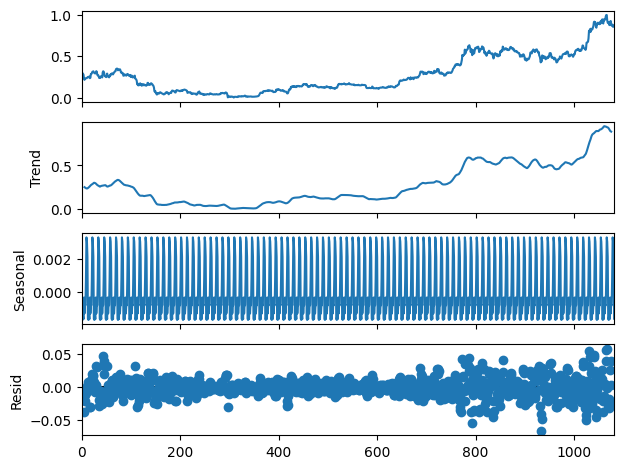


Έλεγχος ADF για την αρχική χρονοσειρά:
ADF Statistic: 1.0223462619015582
p-value: 0.9944962203675435
Critical Values: {'1%': -3.436528314312484, '5%': -2.86426792284943, '10%': -2.568222448164332}
Η χρονοσειρά δεν είναι στάσιμη σύμφωνα με τον έλεγχο ADF (fail to reject null hypothesis).

Έλεγχος KPSS για την αρχική χρονοσειρά:
KPSS Statistic: 3.725478149608647
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Η χρονοσειρά δεν είναι στάσιμη σύμφωνα με τον έλεγχο KPSS (reject null hypothesis).

Υπολογισμός και οπτικοποίηση ACF και PACF για την αρχική χρονοσειρά:


<ipython-input-67-3a3742c91da5>:37: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression=regression, nlags="auto")


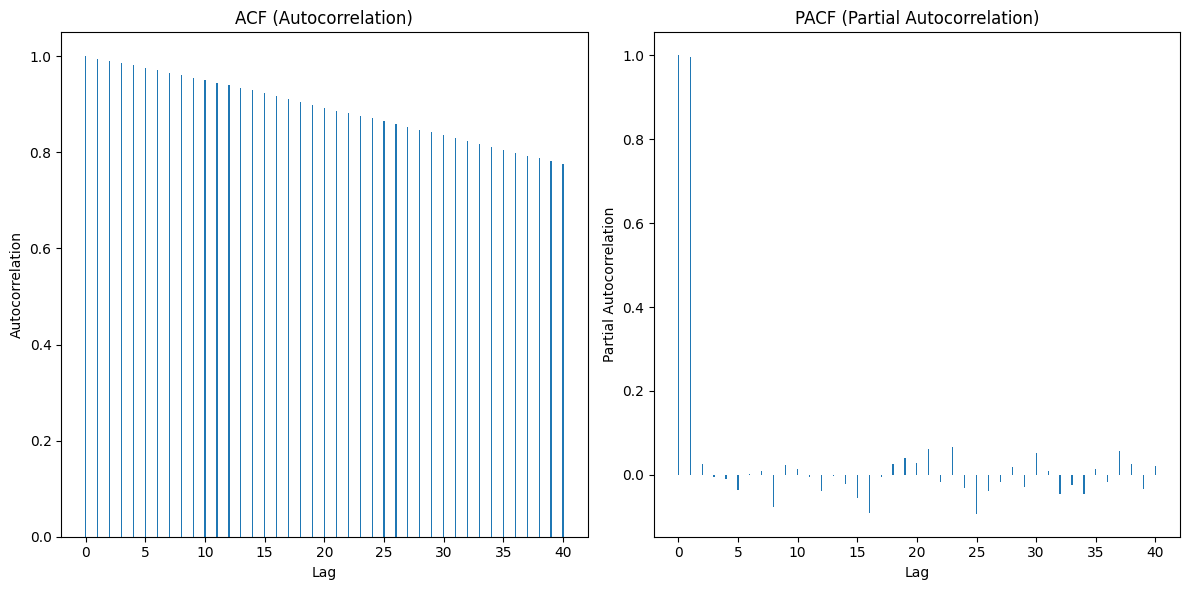


Εφαρμογή πρώτης διαφοροποίησης:

Υπολογισμός και οπτικοποίηση ACF και PACF για τη διαφοροποιημένη χρονοσειρά:


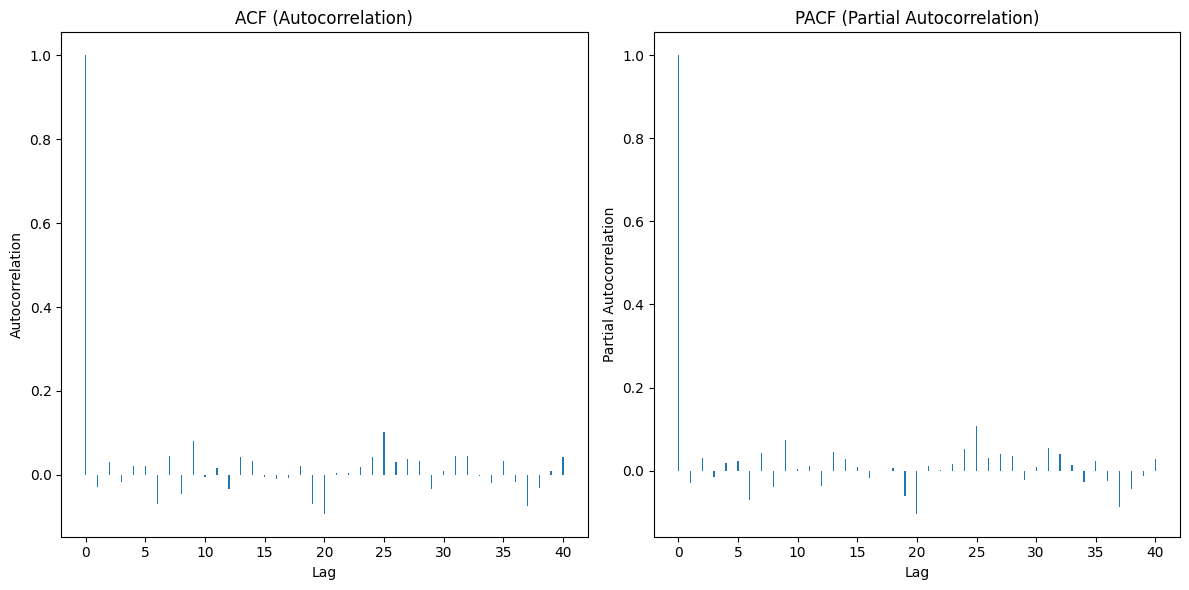


Έλεγχος ADF για τη διαφοροποιημένη χρονοσειρά:
ADF Statistic: -7.952324395913837
p-value: 3.10212710189544e-12
Critical Values: {'1%': -3.436528314312484, '5%': -2.86426792284943, '10%': -2.568222448164332}
Η χρονοσειρά είναι στάσιμη σύμφωνα με τον έλεγχο ADF (reject null hypothesis).

Έλεγχος KPSS για τη διαφοροποιημένη χρονοσειρά:
KPSS Statistic: 0.5651095442633383
p-value: 0.02700235489564453
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Η χρονοσειρά δεν είναι στάσιμη σύμφωνα με τον έλεγχο KPSS (reject null hypothesis).

Εφαρμογή δεύτερης διαφοροποίησης:

Υπολογισμός και οπτικοποίηση ACF και PACF για τη δεύτερη διαφοροποίηση:


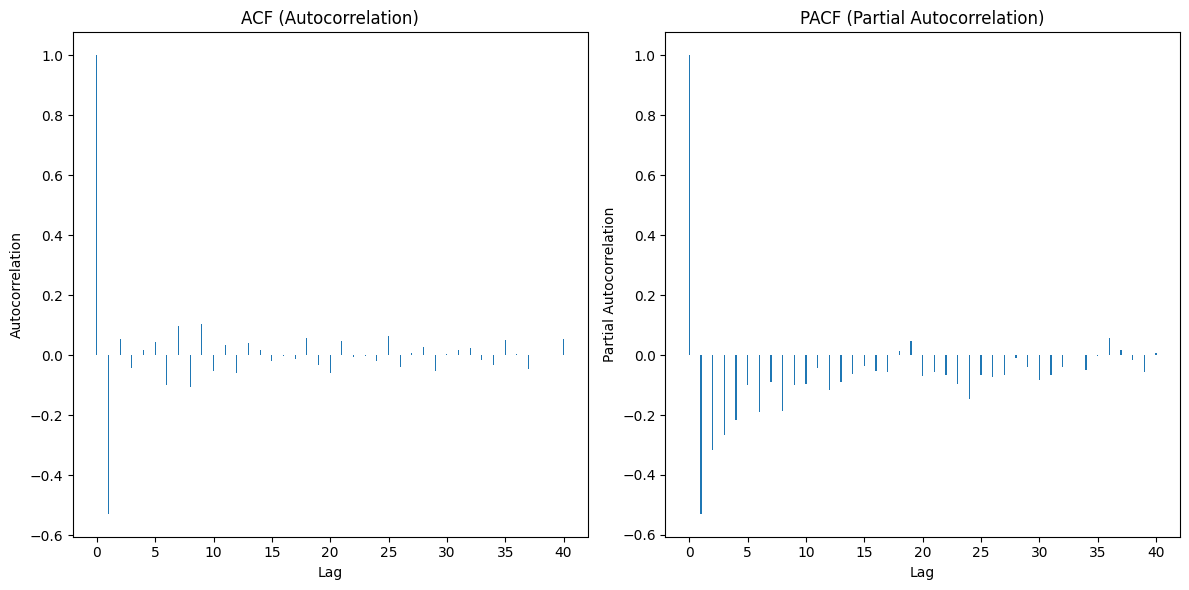


Έλεγχος ADF για τη δεύτερη διαφοροποίηση:
ADF Statistic: -11.668997167096478
p-value: 1.854291037117829e-21
Critical Values: {'1%': -3.4365517520261637, '5%': -2.86427826065702, '10%': -2.5682279541355597}
Η χρονοσειρά είναι στάσιμη σύμφωνα με τον έλεγχο ADF (reject null hypothesis).

Έλεγχος KPSS για τη δεύτερη διαφοροποίηση:
KPSS Statistic: 0.27985738360589335
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Η χρονοσειρά είναι στάσιμη σύμφωνα με τον έλεγχο KPSS (fail to reject null hypothesis).

Η διαφοροποιημένη χρονοσειρά είναι στάσιμη. Ξεκινά η εκπαίδευση ARIMA.


<ipython-input-67-3a3742c91da5>:37: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression=regression, nlags="auto")
<ipython-input-67-3a3742c91da5>:132: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  if adfuller(y_diff2)[1] <= 0.05 and kpss(y_diff2, regression='c')[1] > 0.05:


In [67]:
#Έλεγχος Dickey-Fuller (ADF), PACF και KPSS για στασιμότητα

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from scipy.stats import boxcox

X_seq = np.array(Final_df.drop(columns=["Target"]))  # Εδώ στήλες χαρακτηριστικών
y_seq = np.array(Final_df["Target"])  # Αυτή είναι η τιμή που θέλουμε να προβλέψουμε


# Λειτουργία για την αποσύνθεση της χρονοσειράς
def decompose_time_series(series, frequency):
    decomposition = seasonal_decompose(series, period=frequency, model='additive')
    decomposition.plot()
    plt.show()
    return decomposition

# Έλεγχος Dickey-Fuller (ADF)
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Η χρονοσειρά είναι στάσιμη σύμφωνα με τον έλεγχο ADF (reject null hypothesis).")
    else:
        print("Η χρονοσειρά δεν είναι στάσιμη σύμφωνα με τον έλεγχο ADF (fail to reject null hypothesis).")

# Έλεγχος KPSS
def kpss_test(series, regression='c'):
    result = kpss(series, regression=regression, nlags="auto")
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[3])
    if result[1] <= 0.05:
        print("Η χρονοσειρά δεν είναι στάσιμη σύμφωνα με τον έλεγχο KPSS (reject null hypothesis).")
    else:
        print("Η χρονοσειρά είναι στάσιμη σύμφωνα με τον έλεγχο KPSS (fail to reject null hypothesis).")

# Υπολογισμός και οπτικοποίηση ACF και PACF
def plot_acf_pacf(series, lags=40):
    acf_values = acf(series, nlags=lags)
    pacf_values = pacf(series, nlags=lags)

    plt.figure(figsize=(12, 6))

    # ACF plot
    plt.subplot(121)
    plt.bar(range(len(acf_values)), acf_values, width=0.1)
    plt.title("ACF (Autocorrelation)")
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")

    # PACF plot
    plt.subplot(122)
    plt.bar(range(len(pacf_values)), pacf_values, width=0.1)
    plt.title("PACF (Partial Autocorrelation)")
    plt.xlabel("Lag")
    plt.ylabel("Partial Autocorrelation")

    plt.tight_layout()
    plt.show()

# Λειτουργία για τον υπολογισμό των μετρικών
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R² Score": r2}

# Αποσύνθεση της χρονοσειράς
print("Αποσύνθεση της χρονοσειράς:")
decomposition = decompose_time_series(pd.Series(y_seq), frequency=12)

# Αφαίρεση εποχικότητας
seasonally_adjusted = pd.Series(y_seq) - decomposition.seasonal

# Έλεγχος ADF για την αρχική χρονοσειρά
print("\nΈλεγχος ADF για την αρχική χρονοσειρά:")
adf_test(y_seq)

# Έλεγχος KPSS για την αρχική χρονοσειρά
print("\nΈλεγχος KPSS για την αρχική χρονοσειρά:")
kpss_test(y_seq)

# Υπολογισμός και οπτικοποίηση ACF και PACF για την αρχική χρονοσειρά
print("\nΥπολογισμός και οπτικοποίηση ACF και PACF για την αρχική χρονοσειρά:")
plot_acf_pacf(y_seq)

# Εφαρμογή πρώτης διαφοροποίησης
print("\nΕφαρμογή πρώτης διαφοροποίησης:")
y_diff = np.diff(y_seq, n=1)

# Έλεγχος ACF και PACF για τη διαφοροποιημένη χρονοσειρά
print("\nΥπολογισμός και οπτικοποίηση ACF και PACF για τη διαφοροποιημένη χρονοσειρά:")
plot_acf_pacf(y_diff)

# Έλεγχος ADF για τη διαφοροποιημένη χρονοσειρά
print("\nΈλεγχος ADF για τη διαφοροποιημένη χρονοσειρά:")
adf_test(y_diff)

# Έλεγχος KPSS για τη διαφοροποιημένη χρονοσειρά
print("\nΈλεγχος KPSS για τη διαφοροποιημένη χρονοσειρά:")
kpss_test(y_diff)

# Εφαρμογή δεύτερης διαφοροποίησης
print("\nΕφαρμογή δεύτερης διαφοροποίησης:")
y_diff2 = np.diff(y_diff, n=1)

# Έλεγχος ACF και PACF για τη δεύτερη διαφοροποίηση
print("\nΥπολογισμός και οπτικοποίηση ACF και PACF για τη δεύτερη διαφοροποίηση:")
plot_acf_pacf(y_diff2)

# Έλεγχος ADF για τη δεύτερη διαφοροποίηση
print("\nΈλεγχος ADF για τη δεύτερη διαφοροποίηση:")
adf_test(y_diff2)

# Έλεγχος KPSS για τη δεύτερη διαφοροποίηση
print("\nΈλεγχος KPSS για τη δεύτερη διαφοροποίηση:")
kpss_test(y_diff2)



# Εκπαίδευση ARIMA αν η διαφοροποιημένη χρονοσειρά είναι στάσιμη
if adfuller(y_diff2)[1] <= 0.05 and kpss(y_diff2, regression='c')[1] > 0.05:
    print("\nΗ διαφοροποιημένη χρονοσειρά είναι στάσιμη. Ξεκινά η εκπαίδευση ARIMA.")

else:
    print("\nΗ διαφοροποιημένη χρονοσειρά δεν είναι ακόμη στάσιμη. Εξετάστε άλλες μετασχηματίσεις ή παραμέτρους.")


# Εκπαίδευση ARIMA

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
from math import sqrt

# Λειτουργία για τον υπολογισμό των μετρικών
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R² Score": r2}

# Υποθέτουμε ότι τα y_diff2 είναι τα διαφοροποιημένα δεδομένα
# Δημιουργία χρονοσειράς (y_seq)
# y_seq = τα αρχικά δεδομένα
# y_diff2 = np.diff(np.diff(y_seq))  # Χρήση διαφοροποιημένων δεδομένων

# Εμφάνιση του σχήματος των δεδομένων
print("Shape of y_diff2:", y_diff2.shape)

# Διαχωρισμός test set πριν το K-Fold
train_size = 0.8
y_train_seq, y_test_seq = y_diff2[:int(len(y_diff2) * train_size)], y_diff2[int(len(y_diff2) * train_size):]

# Παράμετροι ARIMA (p, d, q)
p, d, q = 1, 0, 1  # Το d είναι 0, γιατί τα δεδομένα είναι ήδη διαφοροποιημένα δύο φορές

# K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
results_list = []

for train_index, val_index in kf.split(y_train_seq):
    print(f"\n--- Fold {fold} ---")

    # Διαχωρισμός train/validation sets
    y_train_fold, y_val_fold = y_train_seq[train_index], y_train_seq[val_index]

    # Εκπαίδευση ARIMA
    start_time = time.time()
    model = ARIMA(y_train_fold, order=(p, d, q))
    model_fit = model.fit()
    training_time = time.time() - start_time
    print(f"  Finished training in {training_time:.4f} seconds.")

    # Προβλέψεις
    predicted_val = model_fit.forecast(steps=len(y_val_fold))
    predicted_test = model_fit.forecast(steps=len(y_test_seq))

    # Υπολογισμός μετρικών
    val_metrics = calculate_metrics(y_val_fold, predicted_val)
    test_metrics = calculate_metrics(y_test_seq, predicted_test)

    # Αποθήκευση αποτελεσμάτων
    results_list.append({
        "Classifier Name": "ARIMA",
        "Fold": fold,
        "Training or val set": "val",
        "Training Time (s)": training_time,
        "R² Score": val_metrics["R² Score"],
        "MAE": val_metrics["MAE"],
        "MSE": val_metrics["MSE"],
        "RMSE": val_metrics["RMSE"]
    })

    results_list.append({
        "Classifier Name": "ARIMA",
        "Fold": fold,
        "Training or val set": "test",
        "Training Time (s)": None,
        "R² Score": test_metrics["R² Score"],
        "MAE": test_metrics["MAE"],
        "MSE": test_metrics["MSE"],
        "RMSE": test_metrics["RMSE"]
    })

    fold += 1

# Μετατροπή αποτελεσμάτων σε DataFrame
results_df_arima = pd.DataFrame(results_list)

# Αποθήκευση αποτελεσμάτων σε αρχείο CSV
results_df_arima.to_csv('arima_kfold_results.csv', index=False)
print("Τα αποτελέσματα αποθηκεύτηκαν στο αρχείο 'arima_kfold_results.csv'.")


Shape of y_diff2: (1080,)

--- Fold 1 ---
  Finished training in 0.5001 seconds.

--- Fold 2 ---
  Finished training in 1.4444 seconds.

--- Fold 3 ---
  Finished training in 1.2412 seconds.

--- Fold 4 ---
  Finished training in 2.0258 seconds.

--- Fold 5 ---
  Finished training in 0.7041 seconds.
Τα αποτελέσματα αποθηκεύτηκαν στο αρχείο 'arima_kfold_results.csv'.


#Οπτικοποίηση των αποτελεσμάτων

---



<Figure size 2500x600 with 0 Axes>

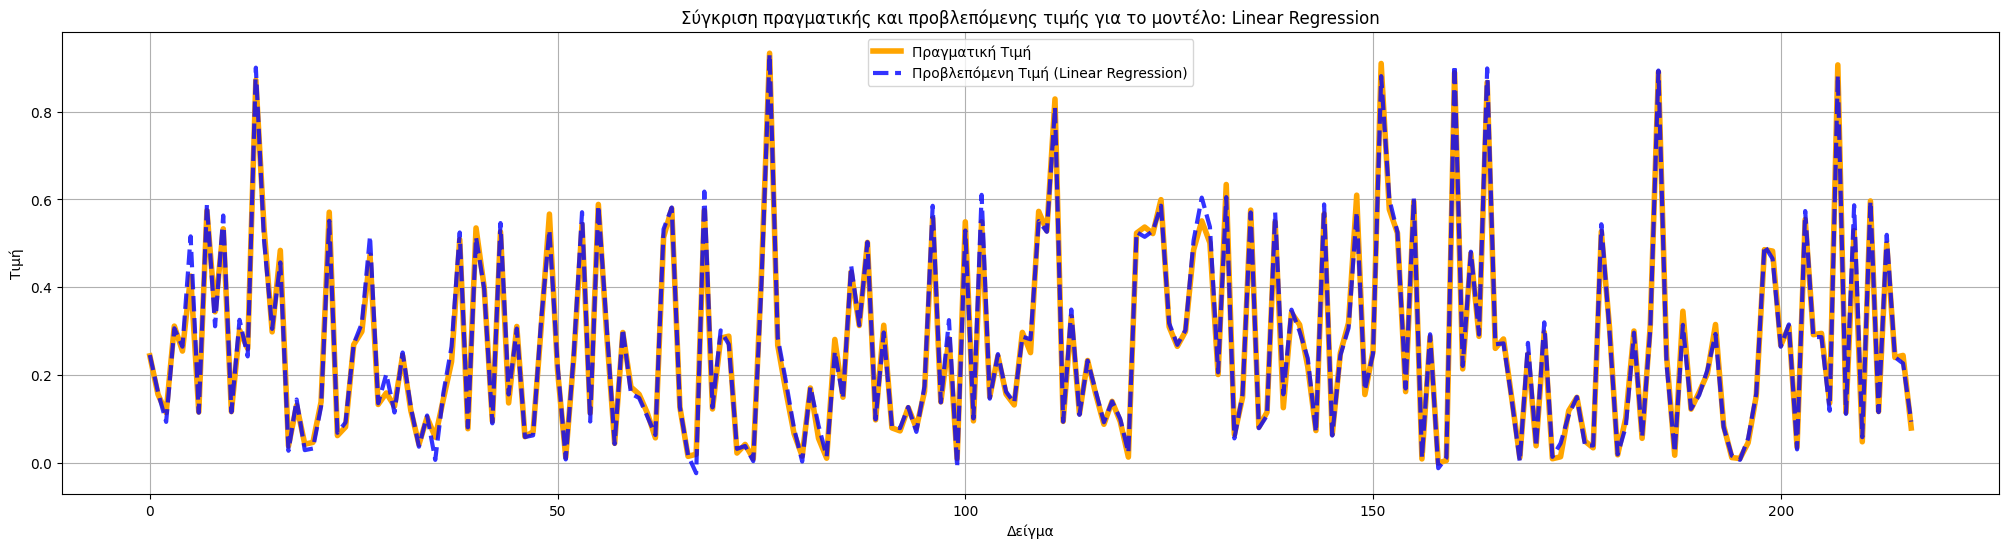

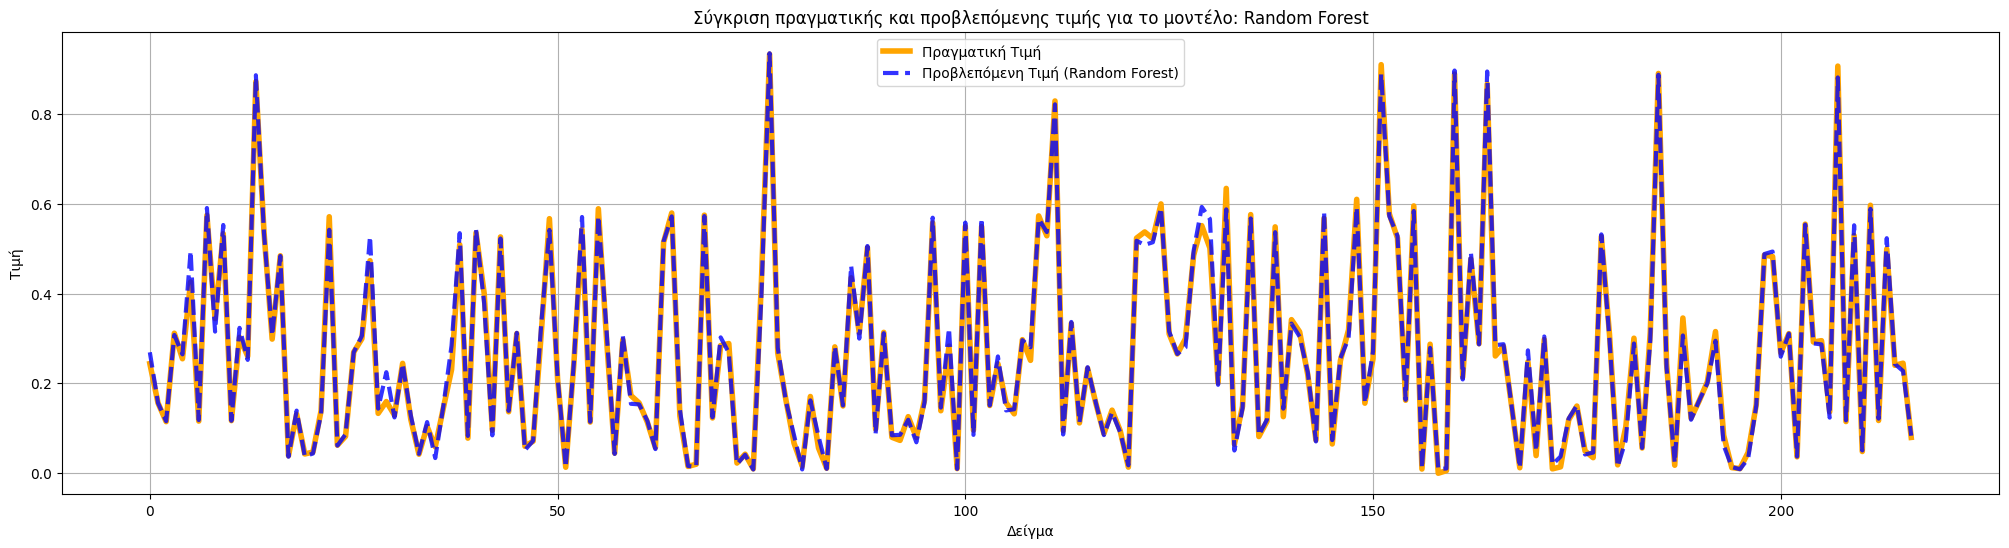

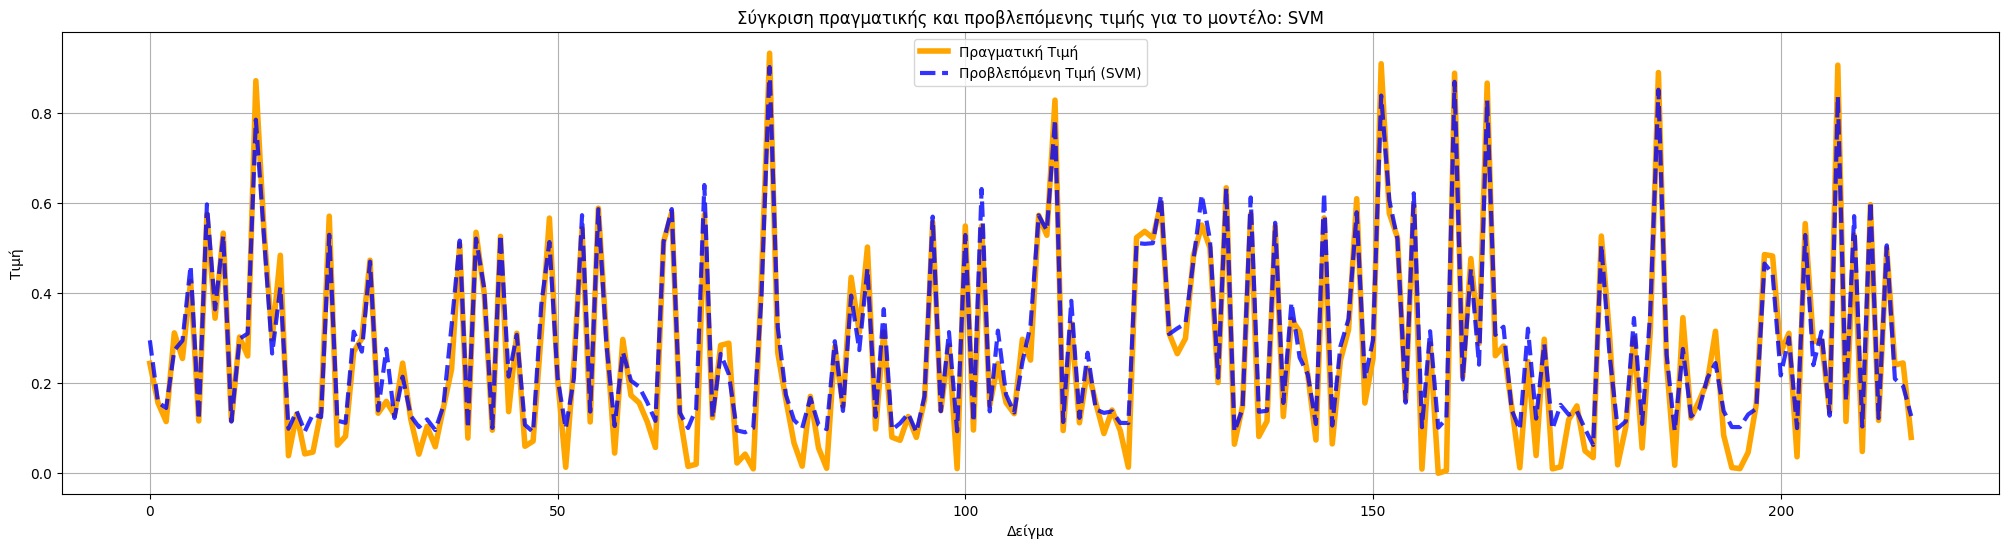

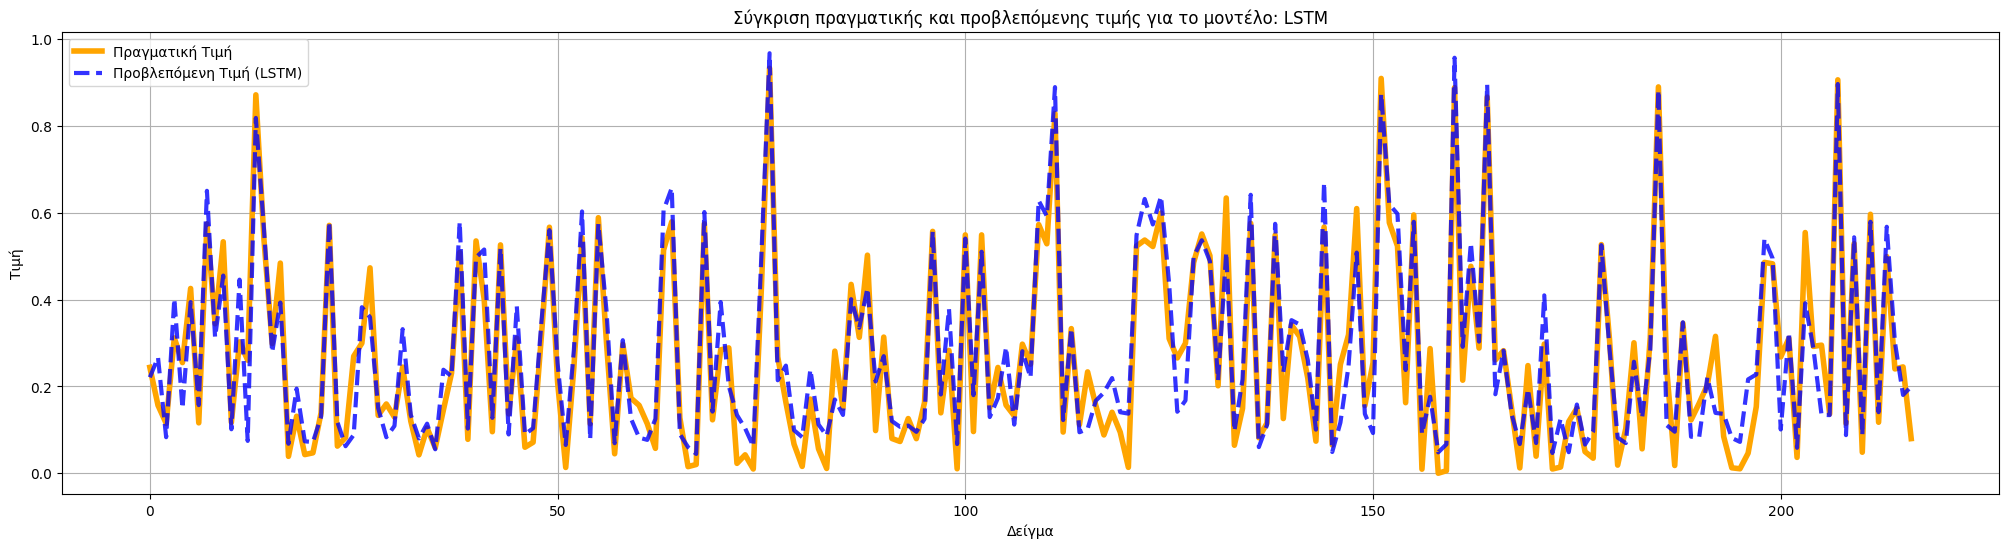

In [73]:
# Σύγκριση πραγματικής τιμής με πρόβλεψη για το test set
plt.figure(figsize=(25, 6))
for model_name in models.keys():
    plt.figure(figsize=(25, 6))
    plt.plot(y_test.values, label="Πραγματική Τιμή", color='orange', lw=4)
    plt.plot(predictions_dict[model_name]["test"], label=f"Προβλεπόμενη Τιμή ({model_name})", linestyle='--', color='blue', lw=3, alpha=0.8)
    plt.title(f"Σύγκριση πραγματικής και προβλεπόμενης τιμής για το μοντέλο: {model_name}")
    plt.xlabel("Δείγμα")
    plt.ylabel("Τιμή")
    plt.legend()
    plt.grid(True)
    plt.show()

# Προσθήκη για το μοντέλο LSTM
plt.figure(figsize=(25, 6))
plt.plot(y_test.values, label="Πραγματική Τιμή", color='orange', lw=4)
plt.plot(predictions_dict_lstm["LSTM"]["test"], label="Προβλεπόμενη Τιμή (LSTM)", linestyle='--', color='blue', lw=3, alpha=0.8)
plt.title("Σύγκριση πραγματικής και προβλεπόμενης τιμής για το μοντέλο: LSTM")
plt.xlabel("Δείγμα")
plt.ylabel("Τιμή")
plt.legend()
plt.grid(True)
plt.show()


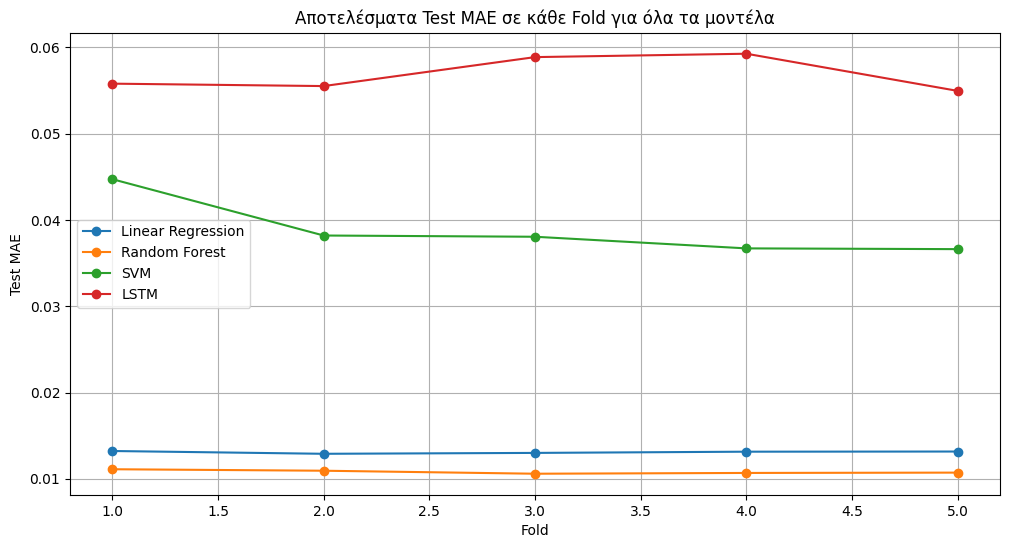

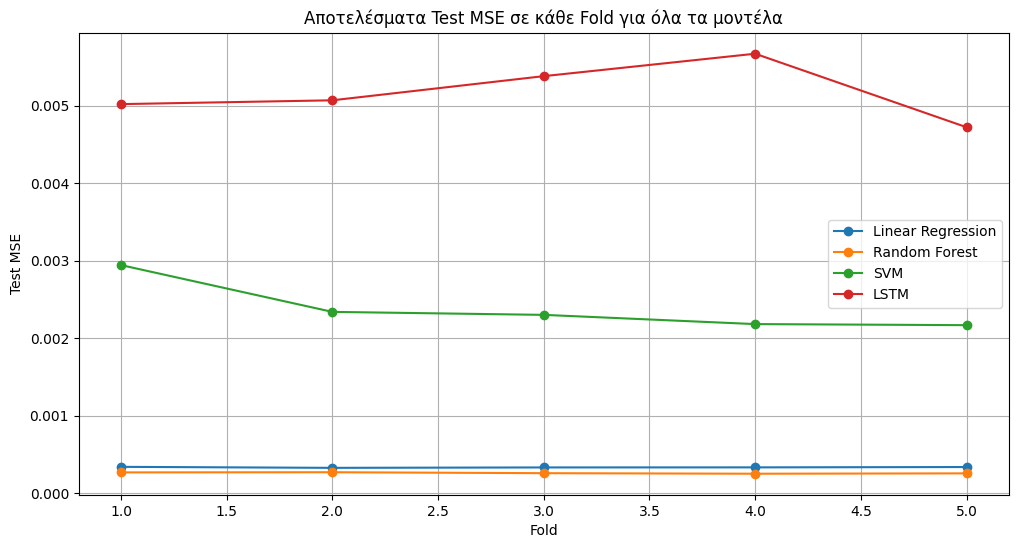

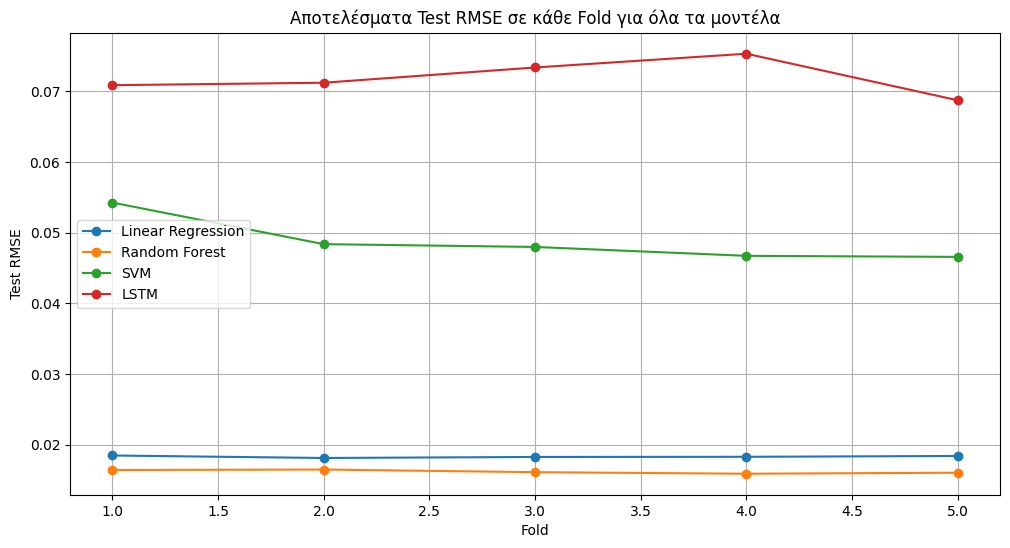

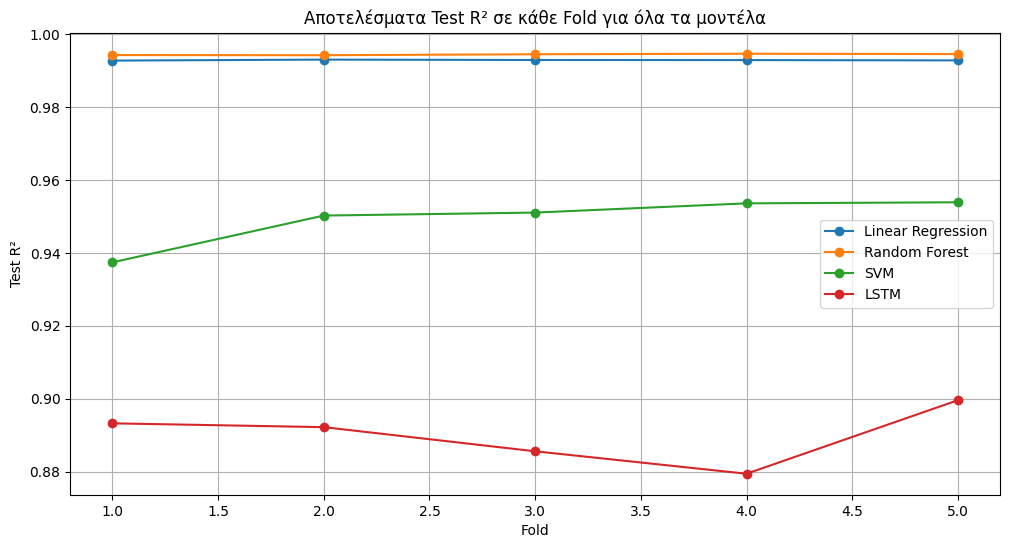

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

# Λίστα με τα ονόματα των μοντέλων
modelss = ["Linear Regression", "Random Forest", "SVM", "LSTM"]

# Φόρτωση των δεδομένων του LSTM από το αρχείο
lstm_results_df = pd.read_csv("lstm_kfold_results.csv")

# --- Δημιουργία δομής δεδομένων για αποθήκευση των test μετρικών ---
test_metrics_per_model = {model: {"Test MAE": [], "Test MSE": [], "Test RMSE": [], "Test R²": []} for model in modelss}

# Συλλογή των test αποτελεσμάτων από το results_df για κάθε μοντέλο και κάθε fold
for model_name in modelss:
    if model_name == "LSTM":
        model_results = lstm_results_df[(lstm_results_df["Classifier Name"] == model_name) &
                                        (lstm_results_df["Training or val or test set"] == "test")]
    else:
        model_results = results_df[(results_df["Classifier Name"] == model_name) &
                                   (results_df["Training or val or test set"] == "test")]

    for fold in model_results["Fold"].unique():
        fold_result = model_results[model_results["Fold"] == fold].iloc[0]
        test_metrics_per_model[model_name]["Test MAE"].append(fold_result["MAE"])
        test_metrics_per_model[model_name]["Test MSE"].append(fold_result["MSE"])
        test_metrics_per_model[model_name]["Test RMSE"].append(fold_result["RMSE"])
        test_metrics_per_model[model_name]["Test R²"].append(fold_result["R² Score"])

# --- Οπτικοποίηση για κάθε μετρική ---
metrics = ["Test MAE", "Test MSE", "Test RMSE", "Test R²"]

for metric in metrics:
    plt.figure(figsize=(12, 6))

    for model in modelss:
        plt.plot(range(1, len(test_metrics_per_model[model][metric]) + 1),
                 test_metrics_per_model[model][metric],
                 label=model, marker='o')

    plt.title(f"Αποτελέσματα {metric} σε κάθε Fold για όλα τα μοντέλα")
    plt.xlabel("Fold")
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()


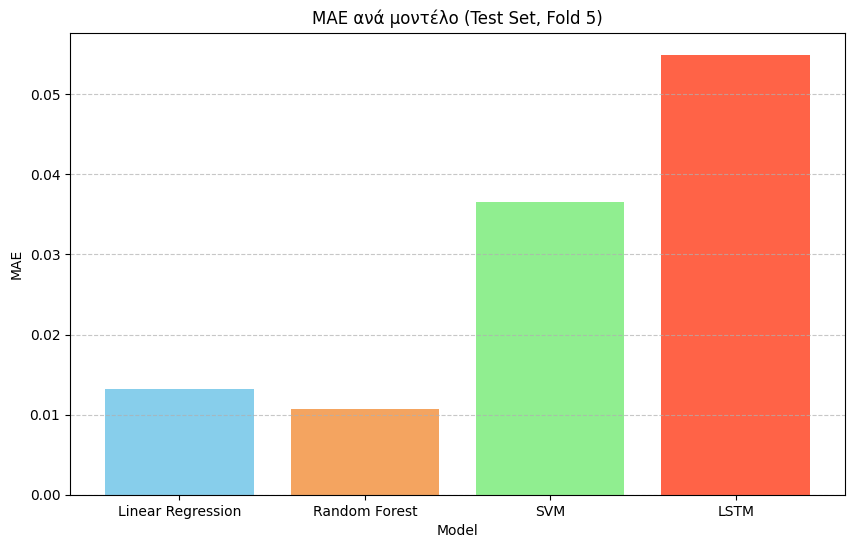

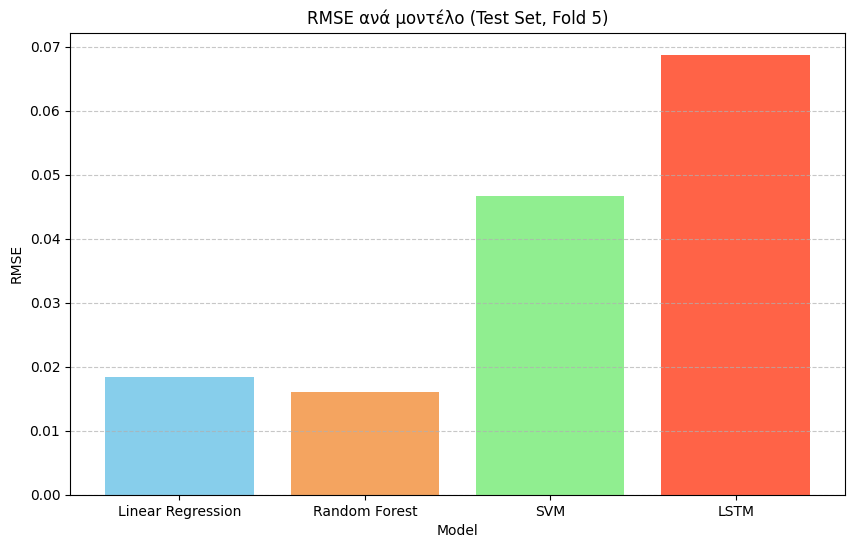

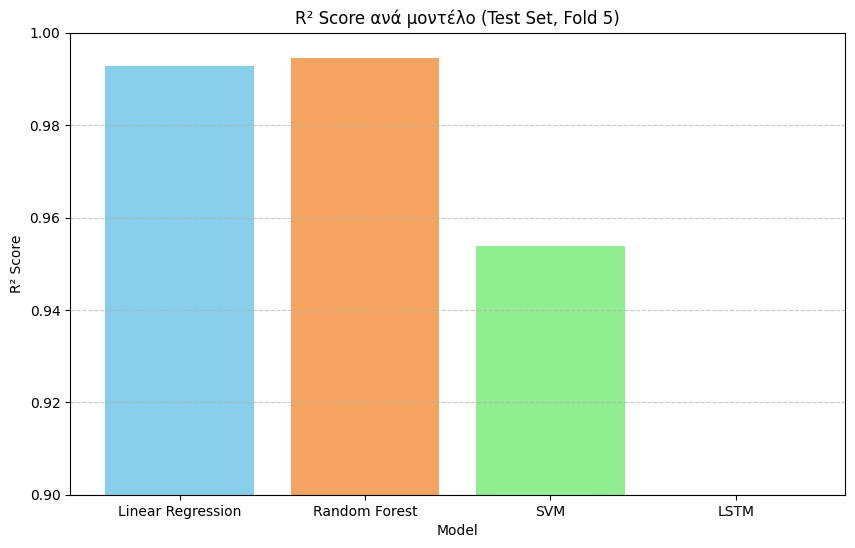

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# Λίστα με τα ονόματα των μοντέλων
modelss = ["Linear Regression", "Random Forest", "SVM", "LSTM"]

# Φόρτωση των δεδομένων του LSTM από το αρχείο
lstm_results_df = pd.read_csv("lstm_kfold_results.csv")

# --- Δημιουργία δομής δεδομένων για αποθήκευση των test μετρικών ---
test_metrics_per_model = {model: {"Test MAE": [], "Test MSE": [], "Test RMSE": [], "Test R²": []} for model in modelss}

# Συλλογή των test αποτελεσμάτων από το results_df για κάθε μοντέλο και κάθε fold
for model_name in modelss:
    if model_name == "LSTM":
        model_results = lstm_results_df[(lstm_results_df["Classifier Name"] == model_name) &
                                        (lstm_results_df["Training or val or test set"] == "test")]
    else:
        model_results = results_df[(results_df["Classifier Name"] == model_name) &
                                   (results_df["Training or val or test set"] == "test")]

    for fold in model_results["Fold"].unique():
        fold_result = model_results[model_results["Fold"] == fold].iloc[0]
        test_metrics_per_model[model_name]["Test MAE"].append(fold_result["MAE"])
        test_metrics_per_model[model_name]["Test MSE"].append(fold_result["MSE"])
        test_metrics_per_model[model_name]["Test RMSE"].append(fold_result["RMSE"])
        test_metrics_per_model[model_name]["Test R²"].append(fold_result["R² Score"])

# --- Οπτικοποίηση για κάθε μετρική ---
metrics = ["Test MAE", "Test MSE", "Test RMSE", "Test R²"]


# --- Οπτικοποίηση σε μορφή bar των μετρικών ανά μοντέλο ---
colors = ['skyblue', 'sandybrown', 'lightgreen', 'tomato']

# Συλλογή δεδομένων για το Fold 5 από τα αποτελέσματα
results_df_fold5 = results_df[(results_df["Training or val or test set"] == "test") & (results_df["Fold"] == 5)]
lstm_results_fold5 = lstm_results_df[(lstm_results_df["Training or val or test set"] == "test") & (lstm_results_df["Fold"] == 5)]
results_df_fold5 = pd.concat([results_df_fold5, lstm_results_fold5])

# --- Οπτικοποίηση MAE ανά μοντέλο ---
plt.figure(figsize=(10, 6))
plt.bar(results_df_fold5["Classifier Name"], results_df_fold5["MAE"], color=colors)
plt.title("MAE ανά μοντέλο (Test Set, Fold 5)")
plt.xlabel("Model")
plt.ylabel("MAE")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Οπτικοποίηση RMSE ανά μοντέλο ---
plt.figure(figsize=(10, 6))
plt.bar(results_df_fold5["Classifier Name"], results_df_fold5["RMSE"], color=colors)
plt.title("RMSE ανά μοντέλο (Test Set, Fold 5)")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Οπτικοποίηση R² Score ανά μοντέλο ---
plt.figure(figsize=(10, 6))
plt.bar(results_df_fold5["Classifier Name"], results_df_fold5["R² Score"], color=colors)
plt.title("R² Score ανά μοντέλο (Test Set, Fold 5)")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.ylim(0.9, 1.0)  # Ρύθμιση άξονα Y για καλύτερη ανάγνωση
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-76-ccf9173b3e06>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Classifier Name", y="Training Time (s)", data=time, palette="tab10")


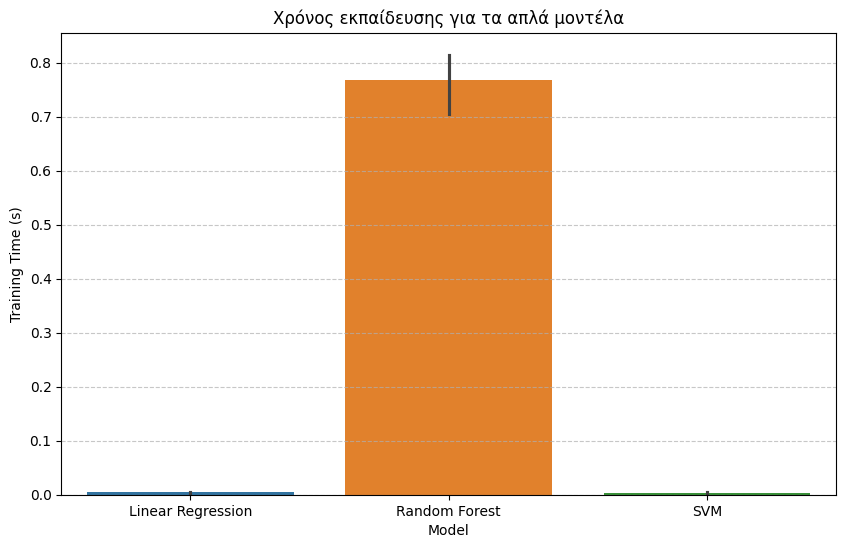

<ipython-input-76-ccf9173b3e06>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Classifier Name", y="Training Time (s)", data=time, palette="tab10")


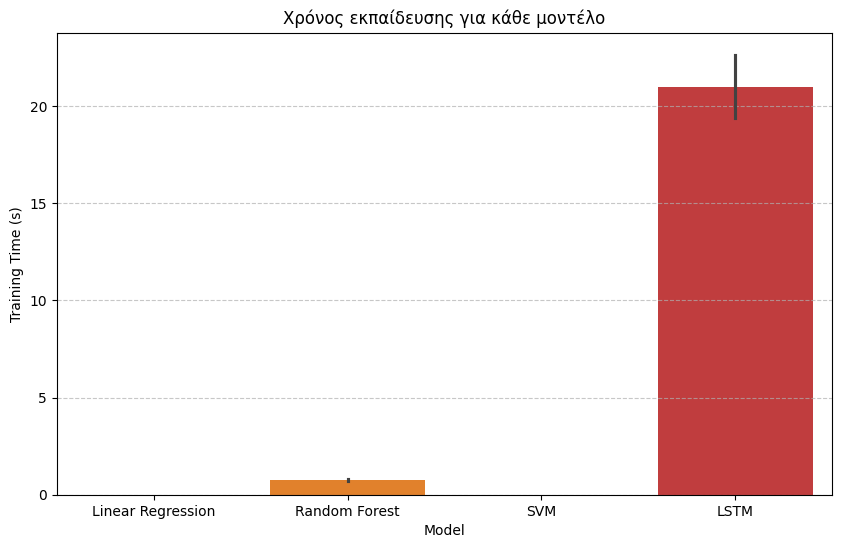

In [76]:
import matplotlib.pyplot as plt

time = results_df[(results_df["Training or val or test set"] == "train") ]

# --- Οπτικοποίηση Training Time (s) ανά μοντέλο ---
plt.figure(figsize=(10, 6))
sns.barplot(x="Classifier Name", y="Training Time (s)", data=time, palette="tab10")
plt.title("Χρόνος εκπαίδευσης για τα απλά μοντέλα")
plt.xlabel("Model")
plt.ylabel("Training Time (s)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Λίστα με τα ονόματα των μοντέλων
modelss = ["Linear Regression", "Random Forest", "SVM", "LSTM"]

# Φόρτωση των δεδομένων του LSTM από το αρχείο
lstm_results_df = pd.read_csv("lstm_kfold_results.csv")

# --- Δημιουργία δομής δεδομένων για αποθήκευση των test μετρικών ---
test_metrics_per_model = {model: {"Test MAE": [], "Test MSE": [], "Test RMSE": [], "Test R²": []} for model in modelss}

# Συλλογή των test αποτελεσμάτων από το results_df για κάθε μοντέλο και κάθε fold
for model_name in modelss:
    if model_name == "LSTM":
        model_results = lstm_results_df[(lstm_results_df["Classifier Name"] == model_name) &
                                        (lstm_results_df["Training or val or test set"] == "test")]
    else:
        model_results = results_df[(results_df["Classifier Name"] == model_name) &
                                   (results_df["Training or val or test set"] == "test")]

    for fold in model_results["Fold"].unique():
        fold_result = model_results[model_results["Fold"] == fold].iloc[0]
        test_metrics_per_model[model_name]["Test MAE"].append(fold_result["MAE"])
        test_metrics_per_model[model_name]["Test MSE"].append(fold_result["MSE"])
        test_metrics_per_model[model_name]["Test RMSE"].append(fold_result["RMSE"])
        test_metrics_per_model[model_name]["Test R²"].append(fold_result["R² Score"])


# --- Οπτικοποίηση Training Time (s) ανά μοντέλο ---
time = pd.concat([results_df[(results_df["Training or val or test set"] == "train")],
                  lstm_results_df[(lstm_results_df["Training or val or test set"] == "train")]])

plt.figure(figsize=(10, 6))
sns.barplot(x="Classifier Name", y="Training Time (s)", data=time, palette="tab10")
plt.title("Χρόνος εκπαίδευσης για κάθε μοντέλο")
plt.xlabel("Model")
plt.ylabel("Training Time (s)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Οπτικοποίηση αποτελεσμάτων ARIMA
Μη επαρκεί αποτελέσματα σε σύγκριση με προηγούμενο μοντέλο - Random Forest -

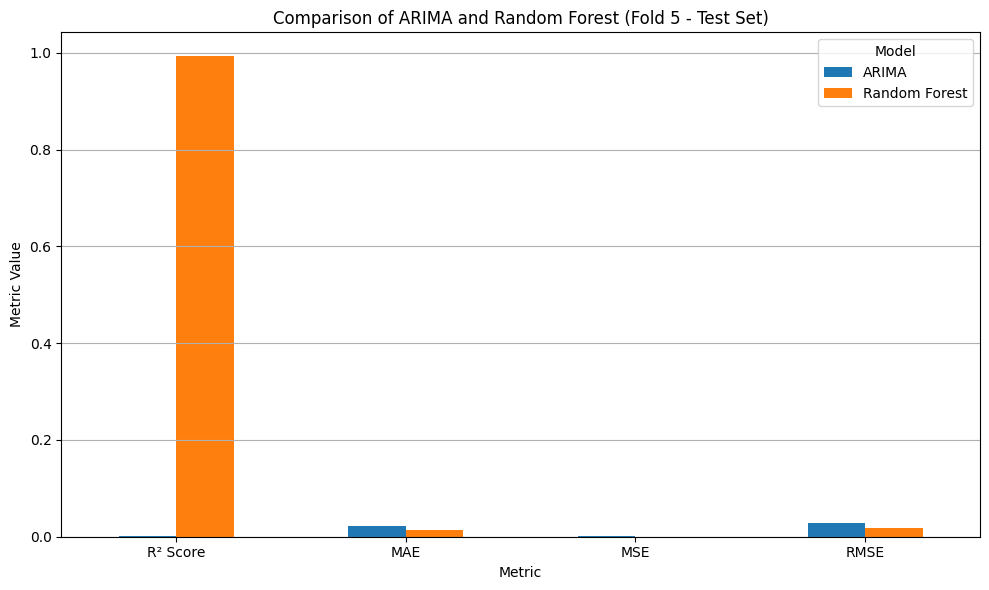

In [78]:
# Φόρτωση δεδομένων Random Forest
random_forest_results = pd.read_csv('model_results.csv')

# Φιλτράρισμα δεδομένων για Fold 5 και Test set
arima_fold5_test = results_df_arima[(results_df_arima['Fold'] == 5) & (results_df_arima['Training or val set'] == 'test')]
random_forest_fold5_test = random_forest_results[(random_forest_results['Fold'] == 5) & (random_forest_results['Training or val or test set'] == 'test')]

# Συνδυασμός αποτελεσμάτων
comparison_df = pd.DataFrame({
    'Metric': ['R² Score', 'MAE', 'MSE', 'RMSE'],
    'ARIMA': [
        arima_fold5_test['R² Score'].values[0],
        arima_fold5_test['MAE'].values[0],
        arima_fold5_test['MSE'].values[0],
        arima_fold5_test['RMSE'].values[0]
    ],
    'Random Forest': [
        random_forest_fold5_test['R² Score'].values[0],
        random_forest_fold5_test['MAE'].values[0],
        random_forest_fold5_test['MSE'].values[0],
        random_forest_fold5_test['RMSE'].values[0]
    ]
})

# Δημιουργία διαγράμματος σύγκρισης
comparison_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of ARIMA and Random Forest (Fold 5 - Test Set)')
plt.ylabel('Metric Value')
plt.xlabel('Metric')
plt.xticks(rotation=0)
plt.legend(title='Model')
plt.grid(axis='y')
plt.tight_layout()
plt.show()